<h1><center>Sheet 2</center></h1>

## Question 1
### a) Verify u1 and u2 are orthogonal

$u1^T . u2 = \begin{bmatrix}3&4&0\end{bmatrix} * \begin{bmatrix}-4\\3\\0\end{bmatrix} = 0$

### b) Find the projection of the point y=[6,3,-2] T on u1 and u2

##### projection of y on u1: <br>
$y . u1\over{norm(u1)^2}$ $.u1 $ <br><br>
$y.u1 = \begin{bmatrix}6&3&-2\end{bmatrix} * \begin{bmatrix}3\\4\\0\end{bmatrix}= 30$ <br><br>
$ 30\over{3^2+4^2}$ $ = 1.2$<br>
projection is: $1.2 * \begin{bmatrix}3\\4\\0\end{bmatrix} = \begin{bmatrix}3.6\\4.8\\0\end{bmatrix}$

##### projection y on u2: 
<br>
$y . u2\over{norm(u2)^2}$ $.u2 $ <br><br>
$y.u2 = \begin{bmatrix}6&3&-2\end{bmatrix} * \begin{bmatrix}-4\\3\\0\end{bmatrix}= -15$ <br><br>
$ -15\over{3^2+4^2}$ $ = -0.6$<br>
projection is: $-0.6 * \begin{bmatrix}-4\\3\\0\end{bmatrix} = \begin{bmatrix}2.4\\-1.8\\0\end{bmatrix}$

## Question 2
### For the data on two class problem
### a) Compute μ +1 and μ −1 , and B , the between-class scatter matrix.

circles = (5,4), (6,5), (7,4), (7,5), (8,2), (9,4)<br>
triangles = (2,3), (3,3), (3,4), (5,8), (7,7) <br> 
$\mu_{circ} = \begin{bmatrix}7\\4\end{bmatrix} $ <br>
$\mu_{tri} = \begin{bmatrix}4\\5\end{bmatrix} $<br> <br>
$B = (\mu_{tri} - \mu_{circ}) * (\mu_{tri} - \mu_{circ})^T = \begin{bmatrix}-3\\1\end{bmatrix} * \begin{bmatrix}-3&1\end{bmatrix} = \begin{bmatrix}9&-3\\-3&1\end{bmatrix}   $

### b) Find the best direction w that discriminates between the classes and sketch it.

$ S^{-1} = \begin{bmatrix}0.056&-0.029\\-0.029&0.052\end{bmatrix} $ <br> <br>
$ S^{-1} * B = \begin{bmatrix}0.592&-0.197\\-0.417&0.139\end{bmatrix} $

[7.30809800e-01 1.90199967e-04]
[[ 0.81745441  0.31583825]
 [-0.57599331  0.94881305]]
Best W is
 [[ 0.81745441]
 [-0.57599331]]


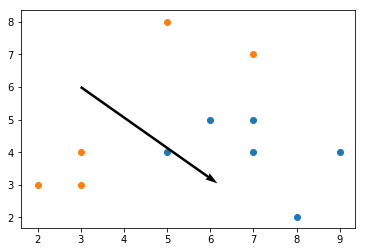

In [10]:
import numpy as np
import matplotlib.pyplot as plt
arr = np.array([[0.592, -0.197],[-0.417,0.139]])
values, vectors = np.linalg.eig(arr)
print(values)
print(vectors)
print('Best W is\n', vectors[:,:1])
circles = np.array([[5,4],[6,5], [7,4],[7,5],[8,2],[9,4]])
triangles = np.array([[2,3], [3,3], [3,4], [5,8], [7,7] ])
# print(circles)
plt.scatter(circles[:,0],circles[:,1])
plt.scatter(triangles[:,0],triangles[:,1])
w = vectors[:,:1]
w = np.array(w)
w = w.reshape(1,2)
start = [3], [6] # origin point
plt.quiver(*start, w[0][0],w[0][1],scale=2)

plt.show()


## Question 3
### a) Compute μ +1 and μ −1 , and B , the between-class scatter matrix.

$\mu_{+1} = \begin{bmatrix}3.75\\3.45\end{bmatrix}$ <br> <br> 
$\mu_{-1} = \begin{bmatrix}2.25\\1.55\end{bmatrix}$<br><br>
$\mu_{+1} - \mu_{-1} = \begin{bmatrix}1.5\\1.9\end{bmatrix}$ <br><br>
$ B = (\mu_{+1} - \mu_{-1}) * (\mu_{+1} - \mu_{-1})^T =\begin{bmatrix}2.25&2.85\\2.85&3.61\end{bmatrix} $

### b) Compute S +1 and S −1 , and S , the within-class scatter matrix.

$Z_{+1} = D_{+1} - \mu_{+1} = \begin{bmatrix}0.25&-0.25\\-0.55&0.55\end{bmatrix} $ <br><br>
$Z_{-1} = D_{-1} - \mu_{-1} = \begin{bmatrix}0.25&-0.25\\-0.25&0.55\end{bmatrix} $ <br><br>
$S_{+1} = Z_{+1} Z_{+1}^T $


In [2]:
import numpy as np
Z1 = np.array([[0.25,-0.25],[-0.55,0.55]])
S1 = np.dot(Z1,Z1.T)
print('S +1=\n',S1)
print('\n')
Z2 = np.array([[0.25,-0.25],[-0.55,0.55]])
S2 = np.dot(Z2,Z2.T)
print('S -1=\n',S2)
print('\n')
S = S1 + S2
print('S = S +1 + S -1 =\n',S)

S +1=
 [[ 0.125 -0.275]
 [-0.275  0.605]]


S -1=
 [[ 0.125 -0.275]
 [-0.275  0.605]]


S = S +1 + S -1 =
 [[ 0.25 -0.55]
 [-0.55  1.21]]


### c) Find the best direction w that discriminates between the classes.

In [4]:
S_inv = np.linalg.pinv(S)
B = np.array([[2.25,2.85],[2.85,3.61]])
mult = np.dot(S_inv, B)

values, vectors = np.linalg.eig(mult)
print(values)
print(vectors)

print('Best W is:\n', vectors[:,:1])


[0.         0.84237193]
[[-0.78488277  0.41380294]
 [ 0.61964429 -0.91036648]]
Best W is:
 [[-0.78488277]
 [ 0.61964429]]


### d) Having found the direction w , find the point on w that best separates the two classes.

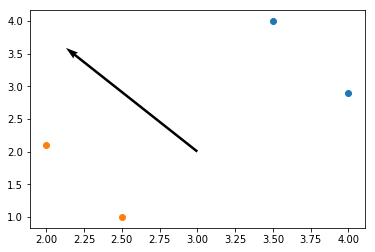

In [7]:
import matplotlib.pyplot as plt
D1 = np.array([[4,2.9],[3.5,4]])
D2 = np.array([[2.5,1],[2,2.1]])
plt.scatter(D1[:,0],D1[:,1])
plt.scatter(D2[:,0],D2[:,1])
w = vectors[:,:1]
w = np.array(w)
w = w.reshape(1,2)
start = [3], [2] # origin point
plt.quiver(*start, w[0][0],w[0][1],scale=2)

plt.show()

## Question 4
### a) Compute μ +1 and μ −1 , and B, the between-class scatter matrix.

$ \mu_{+1} = \begin{bmatrix}4/3\\4/3\end{bmatrix} $<br><br>
$\mu_{-1} = \begin{bmatrix}2.5\\2\end{bmatrix}$<br><br>
$\mu_{+1} - \mu_{-1} = \begin{bmatrix}-7/6\\-2/3\end{bmatrix} $<br><br>
$B = \begin{bmatrix}49/36&7/9\\7/9&4/9\end{bmatrix}$


### b) Compute S +1 and S −1 , and S, the within-class scatter matrix.

In [8]:
import numpy as np
Z1 = np.array([[-1/3,2/3,-1/3],[-1/3,-1/3,2/3]])
S1 = np.dot(Z1,Z1.T)
print('S +1=\n',S1)
print('\n')
Z2 = np.array([[-1/2,-1/2],[0,0]])
S2 = np.dot(Z2,Z2.T)
print('S -1=\n',S2)
print('\n')
S = S1 + S2
print('S = S1 + S -1 =\n',S)

S +1=
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


S -1=
 [[0.5 0. ]
 [0.  0. ]]


S = S1 + S -1 =
 [[ 1.16666667 -0.33333333]
 [-0.33333333  0.66666667]]


### c) Visually sketch the best direction that splits the data into the two classes

[ 2.91666667e+00 -2.22044605e-16]
[[ 0.65079137 -0.49613894]
 [ 0.7592566   0.86824314]]
Best W is:
 [[0.65079137]
 [0.7592566 ]]


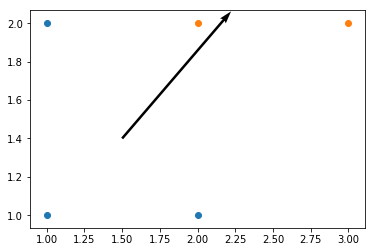

In [9]:
import matplotlib.pyplot as plt
S_inv = np.linalg.inv(S)
B = np.array([[49/36, 7/9],[7/9,4/9]])
mult = np.dot(S_inv, B)

values, vectors = np.linalg.eig(mult)
print(values)
print(vectors)

print('Best W is:\n', vectors[:,:1])


D1 = np.array([[1,1],[2,1],[1,2]])
D2 = np.array([[2,2],[3,2]])
plt.scatter(D1[:,0],D1[:,1])
plt.scatter(D2[:,0],D2[:,1])
w = vectors[:,:1]
w = np.array(w)
w = w.reshape(1,2)
start = [1.5], [1.4] # origin point
plt.quiver(*start, w[0][0],w[0][1],scale=2)

plt.show()